<a href="https://colab.research.google.com/github/RFHertel/ESOF-4011/blob/main/Lab5_Rev2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM ESOF 4011 Lab5 Solution

## Lab Instructor: Robert Hertel

Note: Please share all links with me in the future by pressing share in the top right corner

Introduction Format:

Student Name: Robert Hertel

Sudent ID: XXXXXX

Lab No.: 5 

Colab link: https://colab.research.google.com/drive/18k1vhXSX5t1zmXOq8e23-JbQVVYI66bY#scrollTo=Bt7gG8jggxuE&uniqifier=1



### 1) Data Structures

Import the Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

In [ ]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Data Preprocessing

Divide the attributes into into attributes and labels. Divide these attributes and labels into training and test sets using Scikit-Learn's train_test_split method from their model selection library

In [ ]:
#X = irisdata.drop('Class', axis=1)
# we only take the first two features
X = irisdata.drop(['petal-length', 'petal-width','Class'], axis=1)  
y = irisdata['Class']

In [ ]:
X.head()

,sepal-length,sepal-width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [ ]:
X = irisdata.drop(['petal-length', 'petal-width','Class'], axis=1)                      # avoid this ugly slicing by using a two-dim dataset
#y = iris.target
X = np.array(X.values) 

print(X)
print(type(X))
y = irisdata['Class']
y = y.tolist()
print(y)
le = preprocessing.LabelEncoder()
le.fit(y)

y=le.transform(y)
print(y)
print(type(y))

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Use a Polynomial Kernel for working with non-linearly separable data. Set degree to 8

In [ ]:
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Make Predictions

In [ ]:
y_pred = svclassifier.predict(X_test)

Evaluating the Algorithm

Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))


[[ 9  0  0]
 [ 0 10  2]
 [ 0  2  7]]


Accuracy

In [ ]:
accuracy = svclassifier.score(X_test, y_test)
print(accuracy)

0.8666666666666667


Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.83      0.83        12
           2       0.78      0.78      0.78         9

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



Text(0.5, 1.0, 'SVC with polynomial (degree 3) kernel')

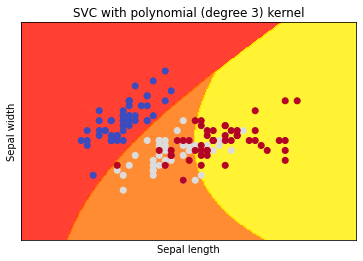

In [ ]:
#Create Plot

h = .02  # step size in the mesh

#create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

Z = svclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=0.8)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with polynomial (degree 3) kernel')

#plt.show()
